In [29]:
import os
import json
import imageio
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from IPython.display import Image
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 300})

In [2]:
# Read dataset
df = pd.read_csv("./../dblp/dataset.csv")

# Exploratory Data Analysis

In [3]:
# Drop duplicates for each professor and create years range
df = df.drop_duplicates(subset=['Professor', 'Title'], keep='first')
years = range(df['Year'].min(), df['Year'].max() + 1)

In [4]:
# Add dates of important events
start_year_cyber_valley = 2016
start_year_IMPRS_IS = 2017
start_year_ELLIS = 2018
start_year_ml_tue = 2019

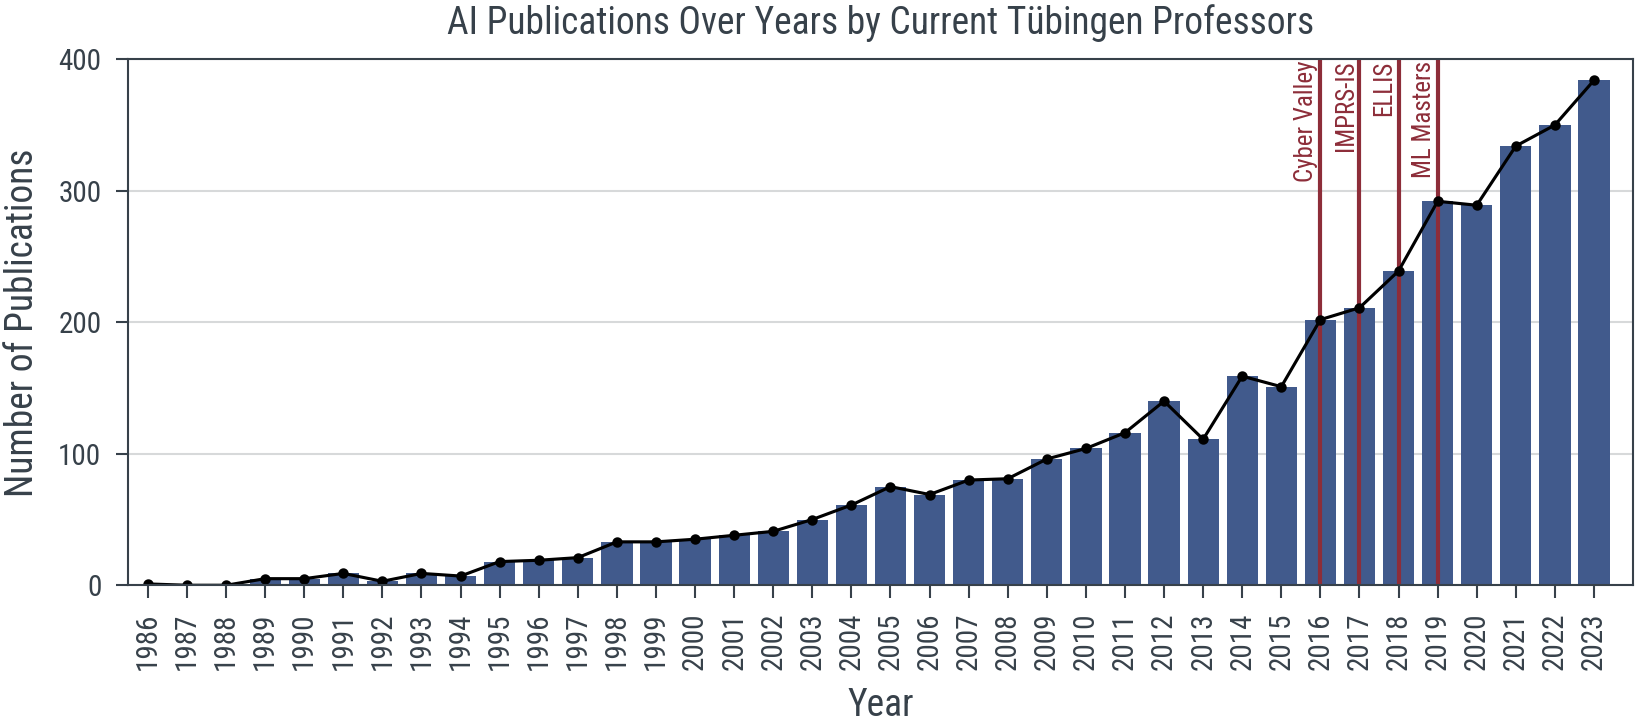

In [5]:
# Remove duplicate titles from the whole dataset
unique_titles_df = df.drop_duplicates(subset='Title', keep='first')

# Calculate number of publications per year (all professors combined)
publications_per_year = unique_titles_df.groupby('Year').size()
publications_per_year = publications_per_year.reindex(years, fill_value=0)

fig, ax = plt.subplots()

# Plot pubications per year
ax.bar(publications_per_year.index, publications_per_year.values, color=rgb.tue_darkblue, alpha=1)

# Draw vertical lines for important events
ax.axvline(start_year_cyber_valley, color=rgb.tue_red, alpha=1.0, ls='-')
ax.axvline(start_year_IMPRS_IS, color=rgb.tue_red, alpha=1.0, ls='-')
ax.axvline(start_year_ELLIS, color=rgb.tue_red, alpha=1.0, ls='-')
ax.axvline(start_year_ml_tue, color=rgb.tue_red, alpha=1.0, ls='-')
ax.text(start_year_cyber_valley - 0.05, ax.get_ylim()[1] * 0.99, 'Cyber Valley', rotation=90, verticalalignment='top', horizontalalignment='right', color=rgb.tue_red, fontsize=6)
ax.text(start_year_IMPRS_IS - 0.05, ax.get_ylim()[1] * 0.99, 'IMPRS-IS', rotation=90, verticalalignment='top', horizontalalignment='right', color=rgb.tue_red, fontsize=6)
ax.text(start_year_ELLIS - 0.05, ax.get_ylim()[1] * 0.99, 'ELLIS', rotation=90, verticalalignment='top', horizontalalignment='right', color=rgb.tue_red, fontsize=6)
ax.text(start_year_ml_tue - 0.05, ax.get_ylim()[1] * 0.99, 'ML Masters', rotation=90, verticalalignment='top', horizontalalignment='right', color=rgb.tue_red, fontsize=6)

# Draw line to trak rising number of publications
ax.plot(publications_per_year.index, publications_per_year.values, '.-', ms=3, lw=0.75, color='black')

ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)

ax.set_xlim([years[0] - 0.5, years[-1] + 1])
ax.set_xticks(years)
ax.tick_params(axis='x', rotation=90)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Publications')
ax.set_title('AI Publications Over Years by Current Tübingen Professors')

plt.show()

fig.savefig('./plots/publications_per_year.png')

In [6]:
# Create a list of professor names and a list of publications types
professors = df["Professor"].unique()
publication_types = df["Publication Type"].unique()

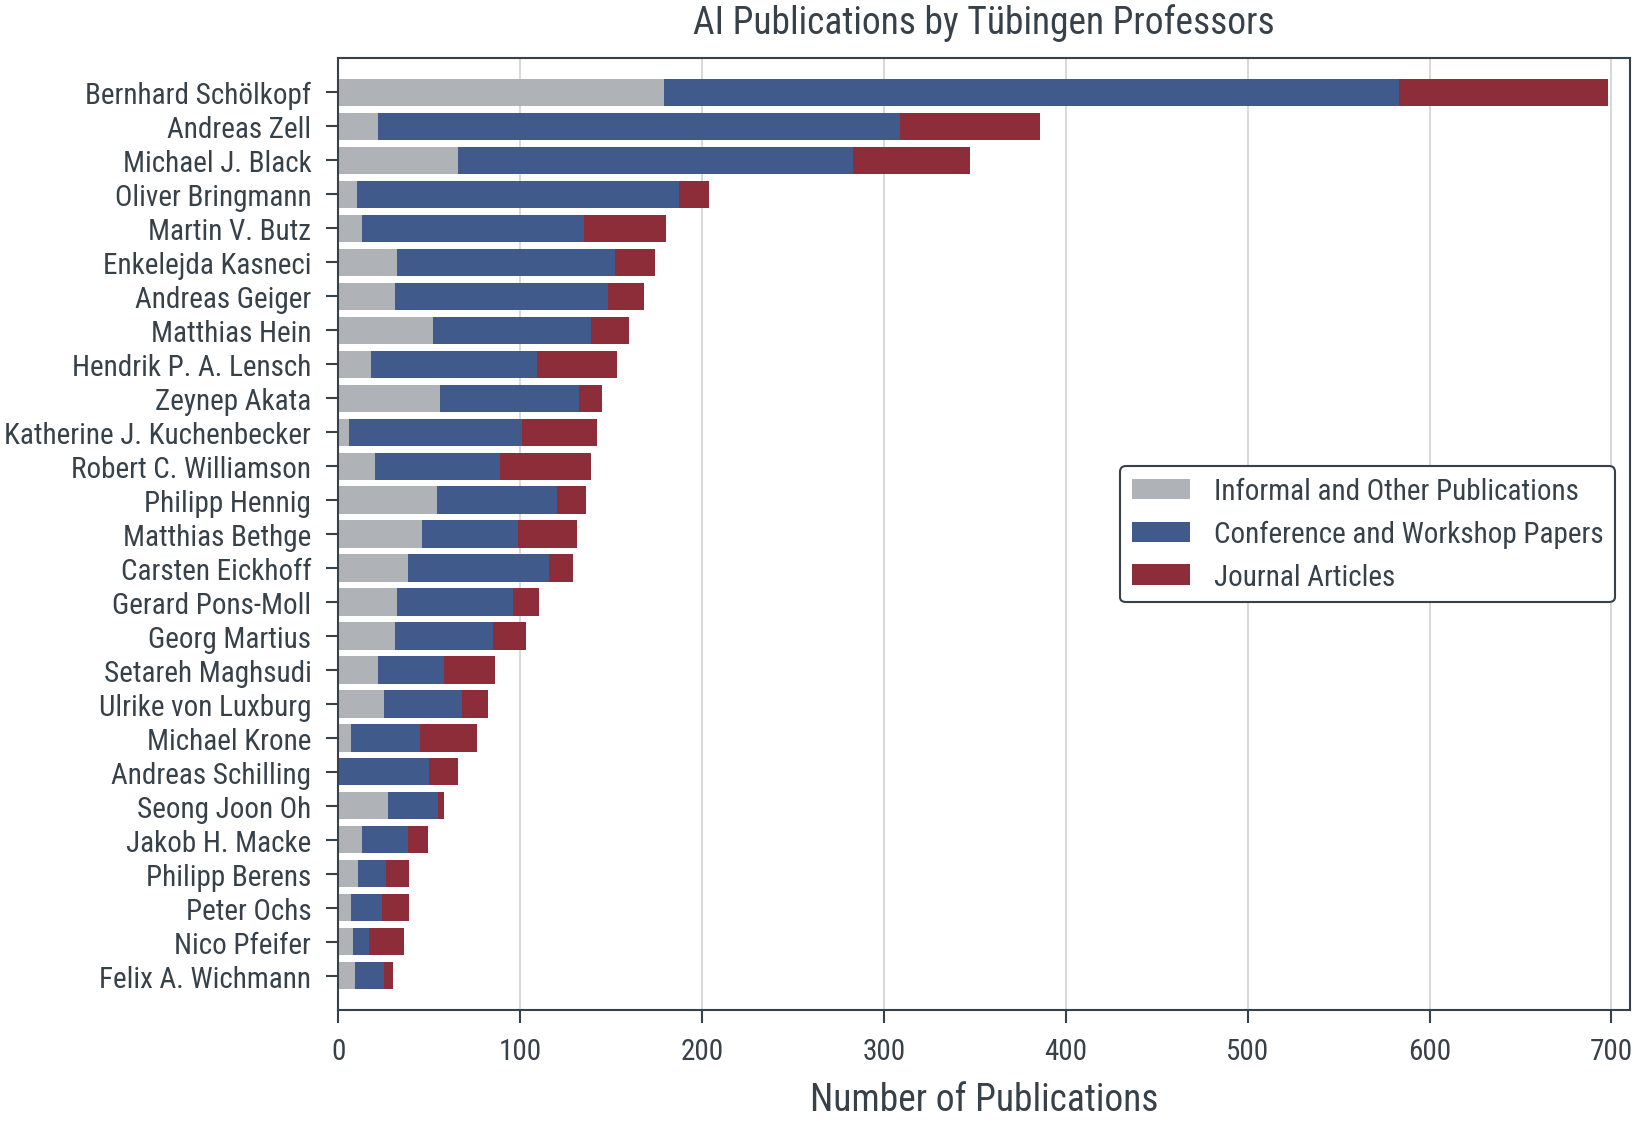

In [7]:
# Calulcate number of publications for each professor and by each publication type
professors_pivot_table = df.pivot_table(index='Professor', columns='Publication Type', aggfunc='size', fill_value=0)
professors_pivot_table['Total'] = professors_pivot_table.sum(axis=1)
professors_pivot_table = professors_pivot_table.sort_values(by='Total', ascending=True)

fig, ax = plt.subplots()
fig.set_size_inches(fig.get_size_inches()[0], 3.8)

# Bar plot
ax.barh(professors_pivot_table.index, professors_pivot_table["Informal or Other Publication"], color=rgb.tue_gray, alpha=1, label="Informal and Other Publications")
ax.barh(professors_pivot_table.index, professors_pivot_table["Conference or Workshop Paper"], left=professors_pivot_table["Informal or Other Publication"], color=rgb.tue_darkblue, alpha=1, label="Conference and Workshop Papers")
ax.barh(professors_pivot_table.index, professors_pivot_table["Journal Article"], left=professors_pivot_table["Informal or Other Publication"] + professors_pivot_table["Conference or Workshop Paper"], color=rgb.tue_red, alpha=1, label="Journal Articles")

ax.set_xlim([0, 710])
ax.set_ylim(-1, len(professors_pivot_table.index))

ax.xaxis.set_major_locator(plt.MultipleLocator(100))
ax.grid(axis="x", which="major", color=rgb.tue_dark, linewidth=0.5)

ax.set_xlabel('Number of Publications')
ax.set_title('AI Publications by Tübingen Professors')
ax.legend(loc="center right", framealpha=1, facecolor="white", frameon=True)

plt.show()

fig.savefig('./plots/publications_per_professors.png')

In [8]:
# Create a plot for each professor with number of publication per year and by publication type
for professor in tqdm(professors, desc="Creating Plot for each Professor"):
    # Calculate professor data
    professor_df = df[df['Professor'] == professor]
    professor_pivot_table = professor_df.pivot_table(index='Year', columns='Publication Type', aggfunc='size', fill_value=0)
    professor_pivot_table = professor_pivot_table.reindex(columns=professor_pivot_table.columns.union(publication_types), fill_value=0)
    professor_pivot_table = professor_pivot_table.reindex(years, fill_value=0)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig.get_size_inches()[0], 2)

    # Bar plot
    ax.bar(years, professor_pivot_table["Informal or Other Publication"], color=rgb.tue_gray, alpha=1, label="Informal and Other Publications")
    ax.bar(years, professor_pivot_table["Conference or Workshop Paper"], bottom=professor_pivot_table["Informal or Other Publication"], color=rgb.tue_darkblue, alpha=1, label="Conference and Workshop Papers")
    ax.bar(years, professor_pivot_table["Journal Article"], bottom=professor_pivot_table["Informal or Other Publication"] + professor_pivot_table["Conference or Workshop Paper"], color=rgb.tue_red, alpha=1, label="Journal Articles")
    
    ax.set_ylim([0, 80])
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)
    
    ax.set_xlim([years[0] - 0.5, years[-1] + 1])
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=90)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Publications')
    ax.set_title(f'AI Publications Over Years by Prof. {professor}')
    ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True)
    
    plt.close()
    
    fig.savefig(f'./plots/publications_per_professor/{professor}.png')

Creating Plot for each Professor: 100%|████████████████████████████████████████████████| 27/27 [00:22<00:00,  1.19it/s]


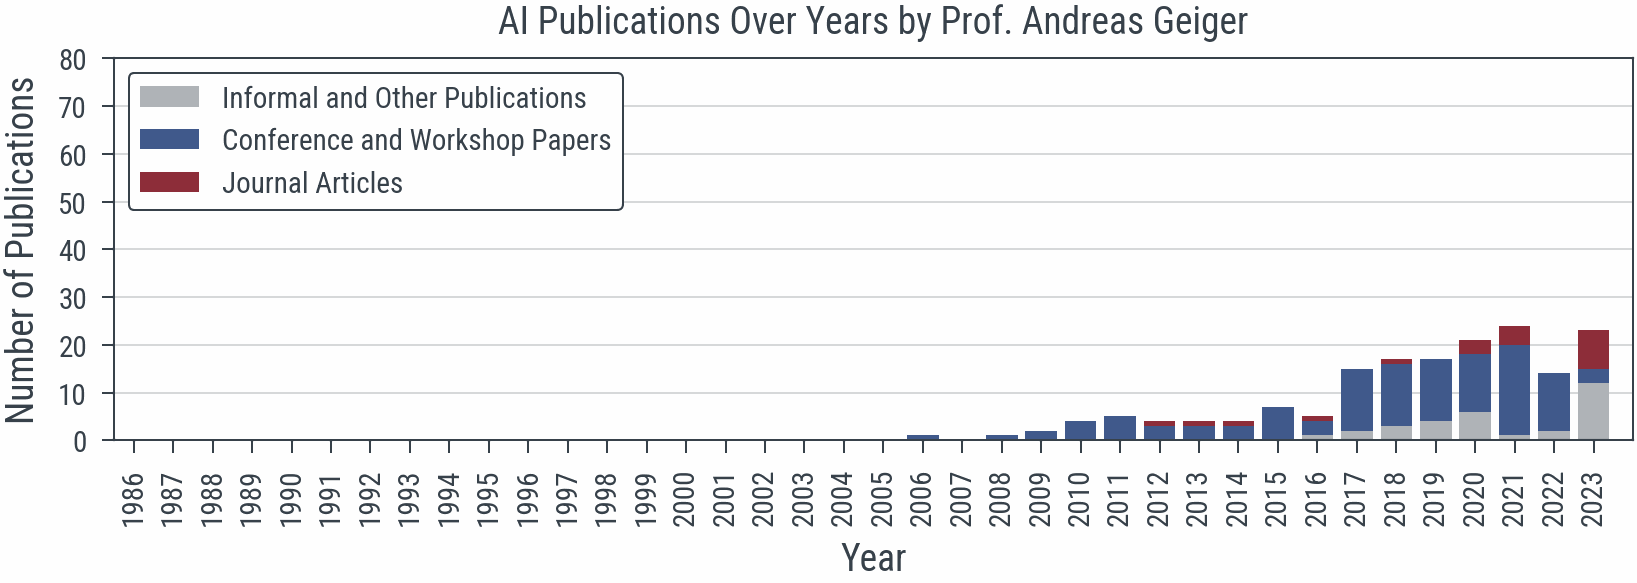

In [9]:
# Create a gif combining plots of all professors
png_dir = './plots/publications_per_professor/'
png_files = [f for f in os.listdir(png_dir) if f.endswith('.png')]

frames = []
for png_file in png_files:
    frames.append(imageio.v2.imread(os.path.join(png_dir, png_file)))

imageio.mimsave('./plots/publications_per_professor.gif', frames, fps=1, loop=0)

Image(filename='./plots/publications_per_professor.gif')

# Topic Modeling

In [10]:
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

porter = PorterStemmer()

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# List of research fields in Tübingen (Source: CS Rankings)
research_fields = [
    'Computer Vision',
    'Robotics',
    'Bioinformatics and Computational Biology',
    'Human-Computer Interaction',
    'Design Automation of Microelectronic Systems (EDA)',
    'Visualization', 
    'Web Information Retrieval',
    'Natural Language Processing',
    'Machine Learning', 
]

# List of keywords pre research field
keywords = {
    'Machine Learning': ['data',  'neural', 'network', 'model', 'algorithm', 'convex', 'deep', 'learning', 'gradient', 'bias', 'regression', 'probabilistic', 'random', 'gaussian', 'probability', 'newton', 'bayes', 'bregman', 'optimization', 'clustering', 'supervised', 'unsupervised', 'zero-shot', 'SGD', 'linear', 'Kullback-Leibler', 'robust', 'transformer', 'parameter', 'causal', 'feature', 'selection', 'kernel', 'distribution', 'support vector machine', 'classif', 'support measure machine', 'decision tree', 'statistical', 'regularization', 'certainty', 'attention', 'encoder', 'decoder', 'graph', 'domain', 'line search', 'generalization', 'posterior', 'likelihood', 'inference', 'adversarial', 'invariance', 'risk', 'fair', 'optimal', 'function', 'dimensionality reduction'],
    'Computer Vision': ['vision', 'image', 'pixel', 'video', '2d', '3d', 'reconstruction', 'segmentation', 'scene', 'GAN', 'VR', 'object', 'detection', 'synthesis', 'optical flow', 'radiance', 'supervised', 'autonomous', 'driving', 'urban', 'occupancy', 'grid', 'stereo', 'camera', 'depth', 'zero-shot', 'pose estimation', 'shape estimation', 'geometric', 'curve', 'point', 'cloud', 'face', 'render', 'texture', 'neural fields', 'gaussian splatting', 'CNN', 'RGB', 'RGBD', 'clothing', 'pose', 'shape', 'people', 'registration', 'occlusion', 'geometry', 'convolution', 'photo', 'recognition', 'human shape', 'human pose', 'LiDAR'],
    'Bioinformatics and Computational Biology': ['bio', 'bacteria', 'gene ', 'protein', 'protein sequence', 'biomolecular', 'protein structure', 'SBML', 'biosynthesis', 'disease', 'diagnosis', 'medical', 'health', 'surgeon', 'surgery', 'medicine', 'biological', 'bacterium', 'glutamicum', 'Homology', 'molecular', 'genotype', 'genom', 'drug', 'neural population', 'biomedical', 'biomedicine', 'antibody', 'cancer'],
    'Human-Computer Interaction': ['eye', 'eye tracking', 'eye movement', 'gaze-based', 'eyelid', 'pupil', 'iris', 'gaze', 'head', 'touch', 'grip', 'haptic', 'tactile', 'contact', 'finger', 'limb', 'hug', 'engagement', 'facial videos', 'classroom', 'hand-raising', 'hand raising', 'classroom videos', 'writing', 'pupil diameter', 'digital classrooms', 'human-robot', 'human-robot-interaction', 'human gaze', 'corneal', 'eye features', 'retina', 'retinal projection', 'human activity', 'stress', 'compulsive', 'children', 'eye-based' 'human-robot collaboration', 'eye opening', 'iris gaze', 'raw eye', 'pupil segmentation', 'eye movement feature', 'eye and head tracking', ],
    'Design Automation of Microelectronic Systems (EDA)': ['chip', 'HW', 'hardware', 'hardware accelerator', 'accelerator', 'low-power', 'embedded system', 'embedded software', 'firmware', 'timing simulation', 'scheduling', 'energey-efficient', 'RISC', 'firmware synthesis', 'firmware design', 'time synchronization', 'delay estimation', 'timing estimation', 'semiconductor', 'RTL', 'RTL simulation', 'energy-efficient', 'energy efficiency', 'energy consumption', 'programmable', 'silicon', 'energy saving', 'power optimization', 'processor', 'GPU core', 'multi-processor', 'multi-core', 'multi-processor-SoC', 'multi-core SoC'],
    'Robotics': ['robot', 'SLAM', 'occupancy', 'grid', 'odometry', 'mobile', 'path', 'planning', 'occlusion', 'localization', 'track', 'RFID', 'navigation', 'laser', 'sensor', 'actuator'], 
    'Visualization': ['visualization', 'visualisation', 'visual analysis', 'visual analytics', 'interactive'], 
    'Web Information Retrieval': ['data mining', 'retrieval', 'web', 'crowdsourcing', 'document', 'query', 'relevance', 'retrieval', 'document-level', 'mitigation in ranking', 'dense retrieval', 'retrieval method', 'reranking', 'document embedding', 'search result', 'document reranking', 'document retrieval', 'inconsistent ranking', 'query likelihood', 'retrieval model', 'web search', 'search engine', 'deep retrieval models', 'information retrieval', 'ranking loss', 'ranking balance', 'data mining', 'crowdsourcing', 'web', 'web search', 'website', 'web site', 'search system', 'hyperlink', 'bag-of-hyperlinks', 'web retrieval', 'entity linking'],
    'Natural Language Processing': ['text-to', 'corpus', 'language', 'summarization', 'gpt', 'bert', 'entity', 'natural language', 'NLP', 'natural language processing']
}

# Preprocess keywords
def preprocess_keyword(keyword):
    words = nltk.word_tokenize(keyword)
    table = str.maketrans('', '', string.punctuation)
    words = [word.translate(table) for word in words]
    words = [porter.stem(word.lower()) for word in words]
    preprocessed_keyword = ' '.join(words)
    if len(words) == 1 and keyword.count(' ') > 0: 
        preprocessed_keyword = preprocessed_keyword + ' ' * keyword.count(' ')
    return preprocessed_keyword

keywords = {research_field: [preprocess_keyword(word) for word in words] for research_field, words in keywords.items()}

In [12]:
# Preprocess titles
def preprocess_title(title):
    words = nltk.word_tokenize(title)
    table = str.maketrans('', '', string.punctuation)
    words = [word.translate(table) for word in words]
    words = [word.lower() for word in words]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word and word not in stop_words]
    words = [porter.stem(word) for word in words]
    preprocessed_title = ' '.join(words)
    return preprocessed_title

# Create a new df that will contain new columns from the classification)
classified_titles_df = df.copy()

# Create 3 new lists (columns)
research_field_column = [] # Single label classification
research_fields_column = [] # Multilabel classification
research_field_percentages_column = [] # Scores (percentages) of multilabel classification
for i, row in tqdm(classified_titles_df.iterrows(), total=len(classified_titles_df), desc='Classifying Paper Titles'):
    # Preprocess title
    title = preprocess_title(str(row["Title"]))

    # Caculate number of keywords in title for each research field
    row_dict = {research_field: 0 for research_field in research_fields}
    for research_field in research_fields:
        for keyword in keywords[research_field]:
            if keyword in title:
                row_dict[research_field] += 1

    # Convert frequency of keywords to percentages
    row_sum = sum(row_dict.values())
    if row_sum != 0: 
        row_dict = {research_field: value / row_sum for research_field, value in row_dict.items()}

    # Sort and select research fields with percentage > 0.33
    row_research_fields = [research_field for research_field, value in row_dict.items() if value > 0.33]
    row_research_fields = sorted(row_research_fields, key=lambda research_field: row_dict[research_field], reverse=True)
    research_fields_column.append(row_research_fields)

    # Add corresponding percentages
    row_research_field_percentages = [row_dict[research_field] for research_field in row_research_fields]
    research_field_percentages_column.append(row_research_field_percentages)

    # For single label classification, select research field with highest score
    # In case of draw, prefer more specific research fields than Machine Learning
    if len(row_research_fields) != 0:
        if  len(row_research_fields) > 1 and row_research_fields[0] == "Machine Learning" and row_dict[row_research_fields[0]] == row_dict[row_research_fields[1]]:
            research_field_column.append(row_research_fields[1])
        else:
            research_field_column.append(row_research_fields[0])
    else:
        research_field_column.append('')

# Append columns to df
classified_titles_df["Research Field"] = research_field_column
classified_titles_df["Research Fields"] = research_fields_column
classified_titles_df["Research Field Percentages"] = research_field_percentages_column

# Save new dataset
classified_titles_df.to_csv('./../dblp/dataset_classified_titles.csv', index=False)

Classifying Paper Titles: 100%|██████████████████████████████████████████████████| 4066/4066 [00:02<00:00, 1495.69it/s]


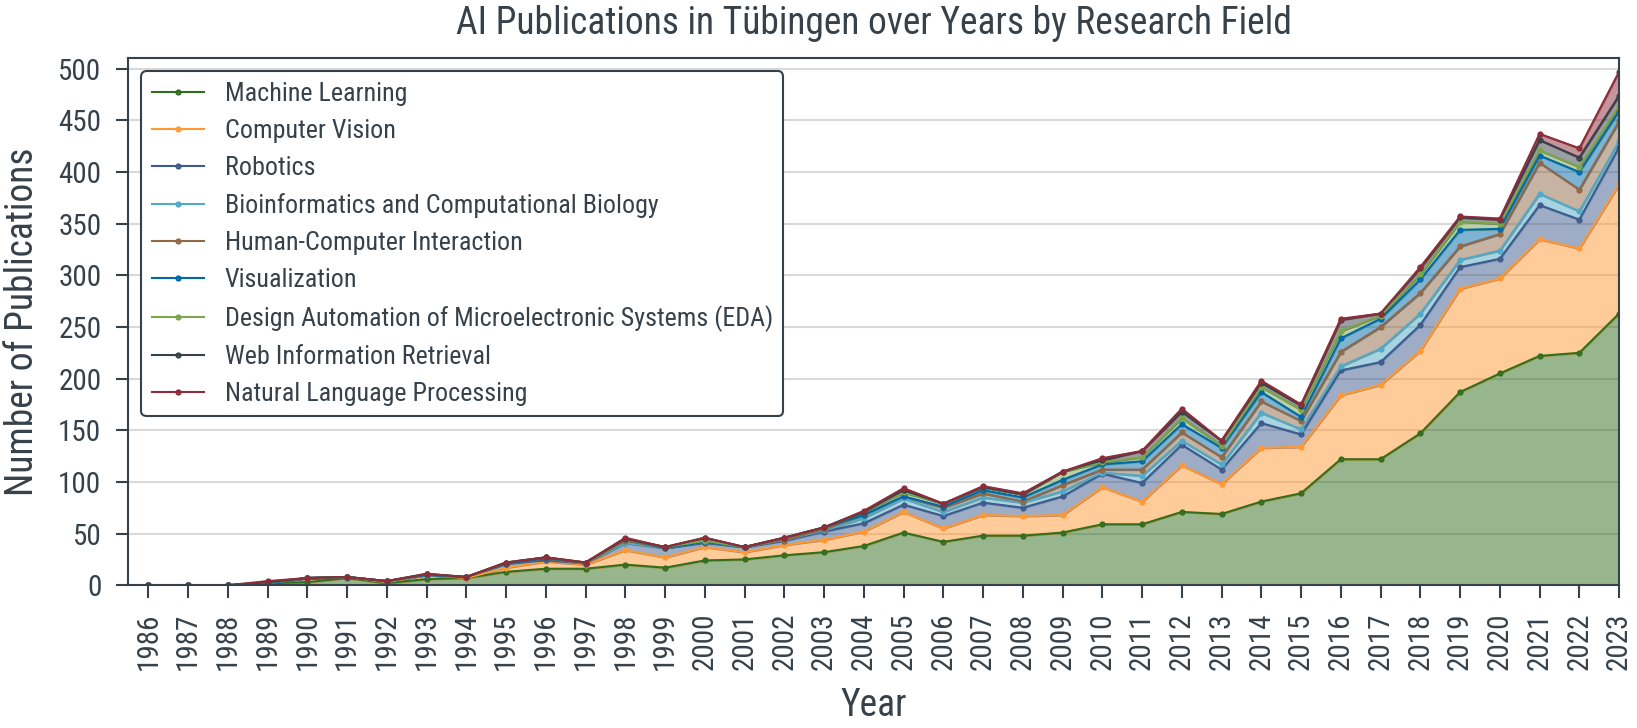

In [52]:
# Create a df with only the rows that have a classification
successfully_classified_titles_df = classified_titles_df[classified_titles_df['Research Fields'].apply(lambda x: len(x) > 0)]

# Save most active research field for each professor to professors_research_fields.json
professors_research_fields = {}
for professor in professors:
    professor_df = successfully_classified_titles_df[successfully_classified_titles_df['Professor'] == professor]
    professor_research_fields = {research_field: 0 for research_field in research_fields}
    for i, row in professor_df.iterrows():
        professor_research_fields[row['Research Field']] += 1 
    professors_research_fields[professor] = max(professor_research_fields, key=professor_research_fields.get)
with open('./../dblp/professors_research_fields.json', 'w') as json_file:
    json.dump(professors_research_fields, json_file, indent=4)

# Remove duplicate title from new df
unique_classified_titles_df = successfully_classified_titles_df.drop_duplicates(subset='Title', keep='first')

# Calculate number of publications per year for each researc field
research_field_counts = {research_field: [0] * len(years) for research_field in research_fields}
for i, row in unique_classified_titles_df.iterrows():
    for research_field in row['Research Fields']:
        research_field_counts[research_field][row['Year'] - min(years)] += 1

fig, ax = plt.subplots()

# Sort research fields with publication counts descendingly (for better visualization) and select colors
sorted_research_fields = ["Machine Learning", "Computer Vision", "Robotics", "Bioinformatics and Computational Biology", "Human-Computer Interaction", "Visualization", "Design Automation of Microelectronic Systems (EDA)", "Web Information Retrieval", "Natural Language Processing"]
sorted_colors = [rgb.tue_darkgreen, rgb.pn_orange, rgb.tue_darkblue, rgb.tue_lightblue, rgb.tue_brown, rgb.tue_blue, rgb.tue_green, rgb.tue_dark, rgb.tue_red]

ms = 1
lw = 0.5
alpha = 0.5

# Compound line plot
bottom = research_field_counts[sorted_research_fields[0]]
ax.plot(years, research_field_counts[sorted_research_fields[0]], '.-', ms=ms, lw=lw, color=sorted_colors[0], label=sorted_research_fields[0])
ax.fill_between(years, research_field_counts[sorted_research_fields[0]], color=sorted_colors[0], alpha=alpha)
for i in range(1, len(sorted_research_fields)):
    ax.plot(years, np.add(bottom, research_field_counts[sorted_research_fields[i]]), '.-', ms=ms, lw=lw, color=sorted_colors[i], label=sorted_research_fields[i])
    ax.fill_between(years, np.add(bottom, research_field_counts[sorted_research_fields[i]]), bottom, color=sorted_colors[i], alpha=alpha)
    bottom = np.add(bottom, research_field_counts[sorted_research_fields[i]])

ax.set_ylim([0, 510])
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)

ax.set_xlim([years[0] - 0.5, years[-1]])
ax.set_xticks(years)
ax.tick_params(axis='x', rotation=90)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Publications')
ax.set_title(f'AI Publications in Tübingen over Years by Research Field')
ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True, fontsize='x-small')

plt.show()

fig.savefig('./plots/publications_per_research_fields.png')

In [33]:
# Create colors dict (used for plotting)
colors = dict(zip(sorted_research_fields, sorted_colors))

# Create a plot for each professor with number of publications per year and per reserach field
for professor in tqdm(professors, desc="Creating Plot for each Professor"):
    # Get professor df
    professor_df = successfully_classified_titles_df[successfully_classified_titles_df['Professor'] == professor]

    # Calulate number of publications per year per reserach field
    research_field_counts = {research_field: [0] * len(years) for research_field in research_fields}
    for i, row in professor_df.iterrows():
        for research_field in row['Research Fields']:
            research_field_counts[research_field][row['Year'] - min(years)] += 1
    
    fig, ax = plt.subplots()

    # Draw lines
    for research_field in research_fields:
        if sum(research_field_counts[research_field]) > 10:
            ax.plot(years, research_field_counts[research_field], '.-', ms=3, lw=0.75, color=colors[research_field], label=research_field)
    
    ax.set_ylim([0, 70])
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    ax.grid(axis="y", which="major", color=rgb.tue_dark, linewidth=0.5)
    
    ax.set_xlim([years[0] - 0.5, years[-1] + 1])
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=90)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Publications')
    ax.set_title(f'AI Publications by Prof. {professor} over Years by Research Field')
    ax.legend(loc="upper left", framealpha=1, facecolor="white", frameon=True, fontsize='x-small')
    
    plt.close()

    fig.savefig(f'./plots/publications_per_professor_by_research_field/{professor}.png')

Creating Plot for each Professor: 100%|████████████████████████████████████████████████| 27/27 [00:13<00:00,  2.06it/s]


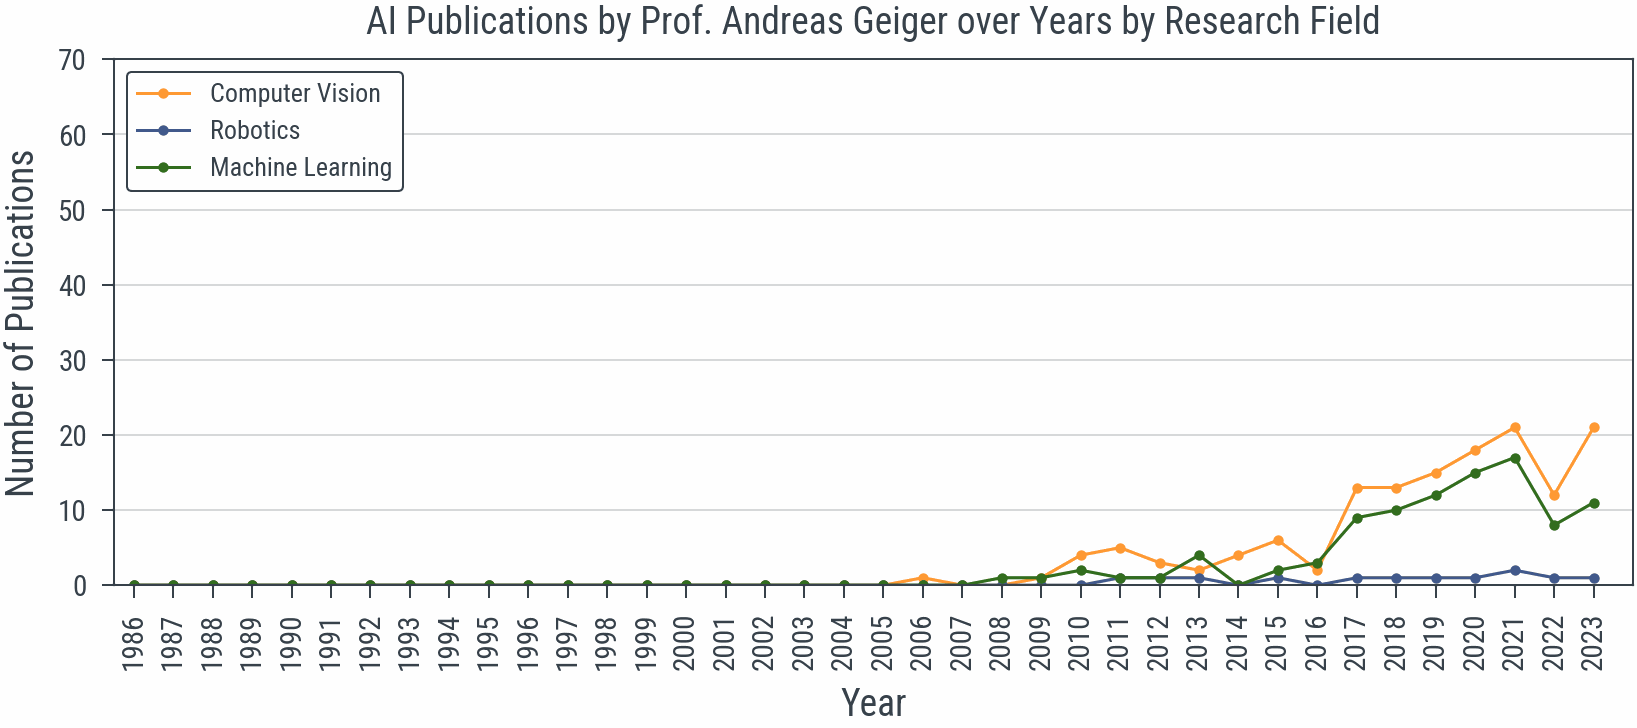

In [15]:
# Create a gif combining plots of all professors
png_dir = './plots/publications_per_professor_by_research_field/'
png_files = [f for f in os.listdir(png_dir) if f.endswith('.png')]

frames = []
for png_file in png_files:
    frames.append(imageio.v2.imread(os.path.join(png_dir, png_file)))

imageio.mimsave('./plots/publications_per_professor_by_research_field.gif', frames, fps=1, loop=0)

Image(filename='./plots/publications_per_professor_by_research_field.gif')

# Research Space Analysis

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Preprocess titles and concatenate them with corresponding research fields (multilabel classification)
titles = []
for i, row in successfully_classified_titles_df.iterrows():
    title = row['Title']
    title_research_fields = ', '.join(row['Research Fields'])
    combined_title = f"{title} {title_research_fields}"
    combined_title = preprocess_title(combined_title)
    titles.append(combined_title)

# Calculate TF-IDF matrix (rows are titles and columns are words)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(titles)

# Reduce dimensionality of each title (row) to 2 using TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Add the embedding of the papers (2D points) to the df
successfully_classified_titles_df = successfully_classified_titles_df.copy()
successfully_classified_titles_df['2D Points'] = X_tsne.tolist()

In [37]:
# Function to reduce name to the form: Initial Letter + Last name (for better readability)
def format_name(name):
    parts = name.split()
    formatted_name = parts[0][0].upper() + ". " + parts[-1]
    return formatted_name

# For each year, create plot with
# - colored points as papers (color determines research field)
# - black points as professor
# - colored circles as research fields
for year in tqdm(years, desc="Creating Plot for each Year"):
    # Get df of papers published until a certain year
    year_df = successfully_classified_titles_df[successfully_classified_titles_df['Year'] <= year]

    # If no papers found, go to next iteration
    if len(year_df) == 0:
        continue
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig.get_size_inches()[0], fig.get_size_inches()[0])

    # Plot paper points
    x_values = year_df['2D Points'].apply(lambda x: x[0]).tolist()
    y_values = year_df['2D Points'].apply(lambda x: x[1]).tolist()
    paper_colors = year_df['Research Field'].apply(lambda x: colors[x]).tolist()
    ax.scatter(x_values, y_values, color=paper_colors, alpha=0.2, s=1)

    # Plot a circle for each research field
    research_field_means = []
    for research_field in research_fields:
        # Get df of the research field
        research_field_df = year_df[year_df["Research Field"] == research_field]
        # Check that the research field has papers in this the specfied year range
        if len(research_field_df) > 1:
            # Calculate research field mean (mean of paper points corresponding to the reserach field)
            research_field_points = np.array(research_field_df['2D Points'].to_list())
            research_field_mean = np.mean(research_field_points, axis=0)
            # Caculate circle radius (mean of distances between paper points corresponding to the reserach field and the reserach field mean)
            research_field_radius = np.mean(np.linalg.norm(research_field_points - research_field_mean, axis=1))
            research_field_means.append(research_field_mean)
            # Draw mean point and circle
            ax.scatter(research_field_mean[0], research_field_mean[1], color=colors[research_field], alpha=1, s=2, label=research_field)
            circle = plt.Circle(research_field_mean, research_field_radius, color=colors[research_field], fill=False)
            ax.add_patch(circle)

    # Draw point for each professor
    for professor in professors:
        # Get df of professor
        professor_df = year_df[year_df['Professor'] == professor]
        # Check that professor has papers in the specified year range
        if len(professor_df) != 0:
            # Calculate professor point (mean of the paper points corresponding to the professor)
            professor_x_values = professor_df['2D Points'].apply(lambda x: x[0]).tolist()
            professor_y_values = professor_df['2D Points'].apply(lambda x: x[1]).tolist()
            professor_point = (np.mean(professor_x_values), np.mean(professor_y_values))
            # Draw professor point
            ax.scatter(professor_point[0], professor_point[1], color=rgb.tue_dark, alpha=1, s=3)
            ax.text(professor_point[0], professor_point[1] - 0.2 if professor == 'Philipp Berens' else professor_point[1] + 0.2, format_name(professor), ha='center', va='top' if professor == 'Philipp Berens' else 'bottom', fontsize=5)

    ax.set_xlim([-80, 80])
    ax.set_ylim([-80, 80])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax.set_title(f'Tübingen Research Space Analyis Until {year}')

    if len(research_field_means) > 0:
        ax.legend(title="Research Fields", loc="lower right", framealpha=1, facecolor="white", frameon=True, fontsize='xx-small')
    
    plt.close()

    fig.savefig(f'./plots/research_space/{year}.png')

Creating Plot for each Year: 100%|█████████████████████████████████████████████████████| 38/38 [00:34<00:00,  1.11it/s]


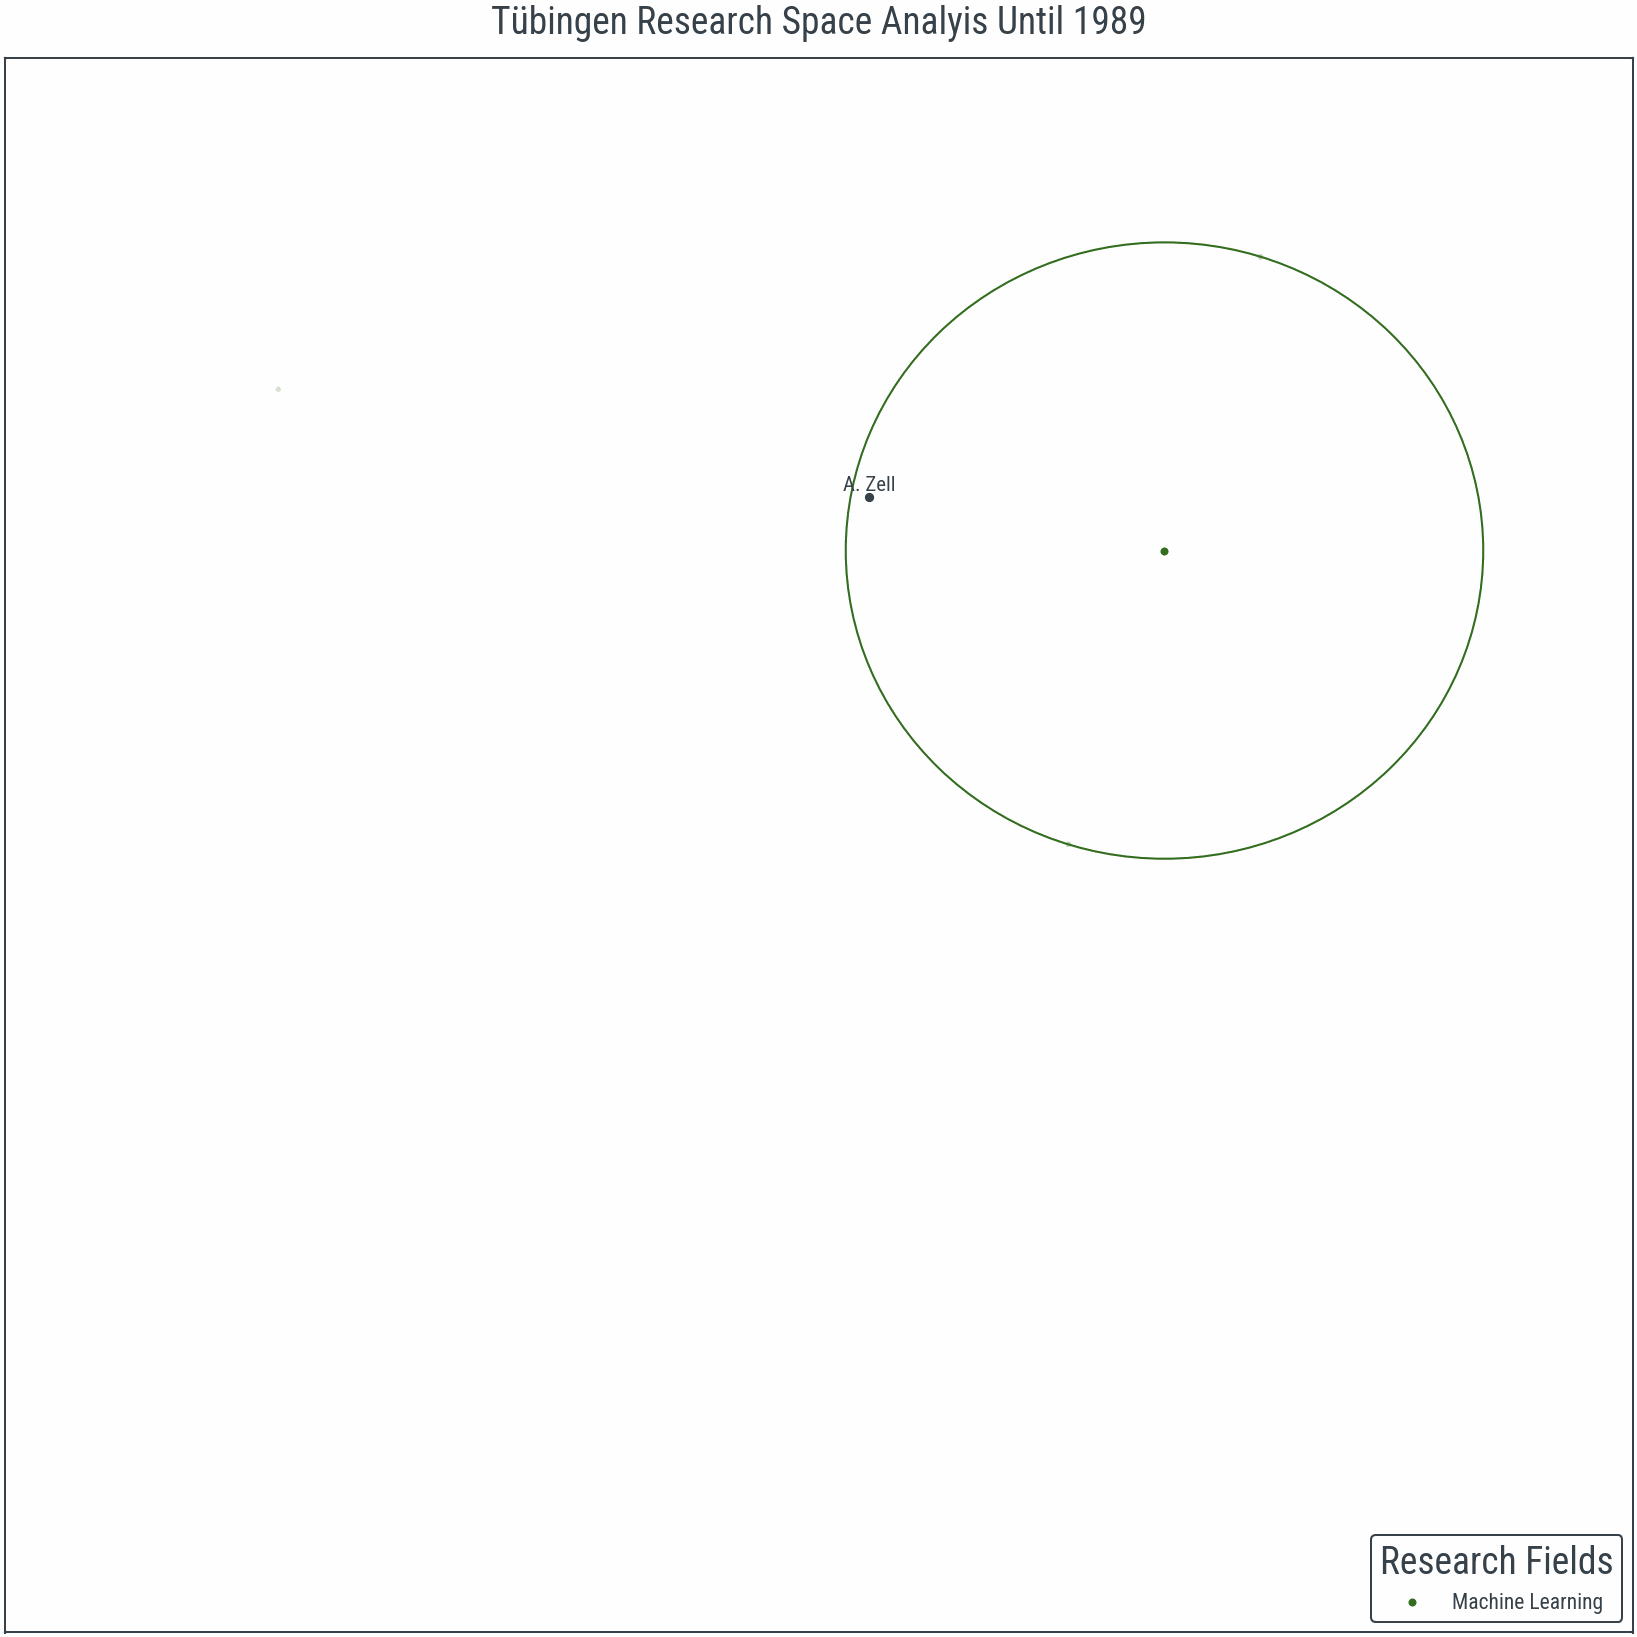

In [38]:
# Create a gif combining plots of all years
png_dir = './plots/research_space/'
png_files = [f for f in os.listdir(png_dir) if f.endswith('.png')]

frames = []
for png_file in png_files:
    frames.append(imageio.v2.imread(os.path.join(png_dir, png_file)))

imageio.mimsave('./plots/research_space.gif', frames, fps=1, loop=0)

Image(filename='./plots/research_space.gif')